___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [2]:
def lancamento_dados():
    lista_result = []
  
    x = 0

    while x < 1000:
        dado6 = randint(1,7)
        lista_result.append(dado6)
        x += 1
    
    return lista_result

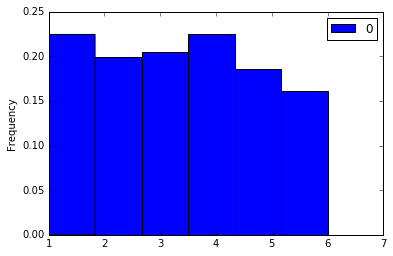

In [7]:
dado1 = pd.DataFrame(randint(1,7,size=1000))
dado1.plot.hist(normed=True,bins=6)

A probabilidade de cada face é igual mas, como são eventos aleatorios, os numeros não batem com exatidão.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

A)
A probabilidade e de 6/36 ou, 1/6 de chance de tirar a soma 7 

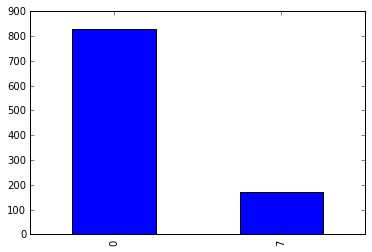

In [4]:
dado1 = lancamento_dados()
dado2 = lancamento_dados()

resposta = []

for i in range(0,1000):
    soma = dado1[i] + dado2[i]
    if soma == 7:
        resposta.append(7)
    else:
        resposta.append(0)

resposta = pd.Series(resposta)
resposta = resposta.astype('category')
resposta.cat.categories = ('0','7')
resposta = resposta.value_counts()
resposta.plot.bar()

B)
A probabilidade de jogar um após o outro e a mesma pois a ordem dos fatores não altera o produto.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [5]:
lista_respostas_sem = {}
lista_respostas_sem['Acertos Sem Troca'] = 0
lista_respostas_sem['Erros Sem Trocas'] = 0
lista_respostas_com = {}
lista_respostas_com['AcertosComTroca'] = 0
lista_respostas_com['ErrosComTroca'] = 0


for i in range(0,10000):
    premiada = randint(1,4)
    escolhida = randint(1,4)
    lista_pode_abrir = [1,2,3]
    lista_pode_abrir.remove(premiada)
    if escolhida in lista_pode_abrir:
        lista_pode_abrir.remove(escolhida)
    abrir = shuffle(lista_pode_abrir)
    

    if escolhida == premiada:
        lista_respostas_sem['Acertos Sem Troca'] += 1
        lista_respostas_com['ErrosComTroca'] += 1
    elif not escolhida == premiada:
        lista_respostas_sem['Erros Sem Trocas'] += 1
        lista_respostas_com['AcertosComTroca'] += 1



In [6]:
lista_respostas_com.update(lista_respostas_sem)
listaFinal = lista_respostas_com
listaFinal

{'Acertos Sem Troca': 3356,
 'AcertosComTroca': 6644,
 'Erros Sem Trocas': 6644,
 'ErrosComTroca': 3356}

## Probabilidades teorema de Bayes

1: Acertar na primeira e manter na segunda:
p(A/B) = 0,33

2: Acertar na primeira e errar na segunda:
p(A/B) = 0,33

3: Errar os dois:
p(A/B) = 0,66

4: Errar o primeiro e acertar o segundo:
p(A/B) = 0,66

## comparando os Numeros:
Pelo codigo do sistema, temos que de cada 10000 vezes jogadas, voce acerta de primeira 3433 vezes(+- 33%) e 6567 vezes se trocar na segunda(+- 66%) o que bate com os números calculados.